In [1]:
from IPython.core import display
from io import BytesIO
from PIL import Image
import numpy as np
import random
import os
import neurolab as nl
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import time

%matplotlib inline

In [2]:
os.chdir("..")
%pwd

u'/home/joe/Documents/pycode/compOpt_Project'

In [3]:
def getData(path):
    "Splits the data into X and y both being numpy arrays (data already normalized)"
    f = open(path)
    lines = f.readlines()
    f.close
    
    images = []
    classification = []
    for line in lines:
        nums = line.split()
        classification.append(nums[0])
        images.append([((float (val))) for val in nums[1:]])
    return (np.array(classification, dtype=np.float),np.array(images))

def display_grayscale(arr):
    "SIDE EFFECTS: INTENDED TO BE USED IN IPYTHON NOTEBOOK"
    img = np.array([round(val,2) for val in arr]).astype('uint8').reshape((16,16))
    plt.imshow(img, cmap = cm.Greys_r)
    return Image.fromarray(img)

In [4]:
#classificationTrain,trainData = getData("ZipDigits.train.txt")
#classificationTest,testData = getData("ZipDigits.test.txt")

#combined set since we will use or on seperation technique
classification,data = getData('combinedData.txt')

In [5]:
# Create network with 256 inputs, 2 neurons in hidden layer
# And 256 in output layer

ann = nl.load('features/ann60.net')
size = 100
subData = data[:size]
#inputParams = [[-1, 1]] * len(subData[0])
#ann = nl.net.newff(inputParams, [2,256])
#ann.trainf = nl.train.train_rprop

In [7]:
#cuts the last layer off of ann making the net that makes the features
inputParams = [[-1, 1]] * len(subData[0])
featureNet = nl.net.newff(inputParams, [60])
featureNet.layers[0].np['w'][:] = ann.layers[0].np['w']
featureNet.layers[0].np['b'][:] = ann.layers[0].np['b']

In [8]:
#trainNetFeatures = featureNet.sim(trainData)
#testNetFeatures = featureNet.sim(testData)
netFeatures = featureNet.sim(data)

In [14]:
#np.savetxt('features/trainNetFeatures.txt', trainNetFeatures)
#np.savetxt('features/testNetFeatures.txt', testNetFeatures)
#np.savetxt('features/classificationTrain.txt',classificationTrain)
#np.savetxt('features/classificationTest.txt',classificationTest)

#for combined data since we will probably use K-folds anyway
np.savetxt('features/netFeatures.txt', netFeatures)
np.savetxt('features/classification.txt', classification)


(9298,)

In [ ]:
# Train process
#last condition epochs=100000000,show=100000,
err = ann.train(subData, subData,epochs=100000000,show=100000, goal=1)

test


<PIL.Image.Image image mode=L size=16x16 at 0x7F5250C29EA8>

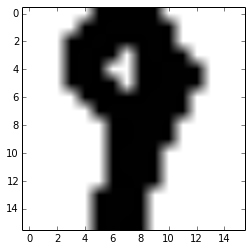

In [23]:
#this block just used for comparing random pictures within the training set
ind = random.randrange(0,size)
sub = ann.sim(subData[ind:ind+1])
print "test"
display_grayscale(sub[0])

<PIL.Image.Image image mode=L size=16x16 at 0x7F5250C29128>

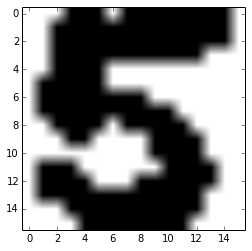

In [35]:
#outside of the data set
ind = random.randrange(size,size+200)
display_grayscale(data[ind])

<PIL.Image.Image image mode=L size=16x16 at 0x7F52520A2E18>

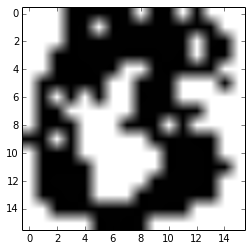

In [36]:
exampleOutput = ann.sim(data[ind:ind+1])
#exampleTest = 
display_grayscale(exampleOutput[0])

#example.save('example1OUTPUT.png')

In [1]:
ann.save('ann60.net')

NameError: name 'ann' is not defined